In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [2]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0.0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0.0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0.0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0.0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1.0,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


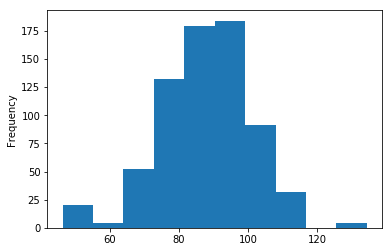

In [3]:
spectra['target'].plot.hist()
plt.show()

In [4]:
# dataset shape
spectra.shape

(698, 293)

# Dataset clean ?

In [5]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [6]:
spectra.isnull().sum().sum()

0

In [7]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(293)
memory usage: 1.6 MB


# Possible outliers cleaning

In [8]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

# Outlier cleaning within sample ID

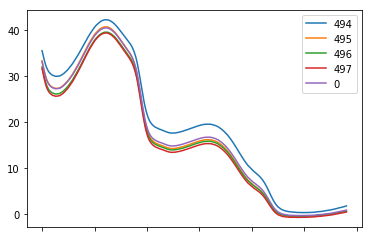

In [9]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [10]:
subsetcol = ['sampleID']
subsetcol.extend([str(x) for x in range(950, 1530+1,2)])
df = spectra[subsetcol]
df.head()

,sampleID,950,952,954,956,958,960,962,964,966,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,0.0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,31.536673,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,0.0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,31.159092,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,0.0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,30.235334,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,0.0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,30.029732,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,1.0,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,31.041756,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


In [11]:
cols = [str(x) for x in range(950, 1530+1,2)]
result = (df[cols]- df.groupby('sampleID').transform('mean').values) > df.groupby('sampleID').transform('std')*1.45
spectra[result.sum(axis=1) == 0].shape

(525, 293)

In [12]:
spectra = spectra[result.sum(axis=1) == 0]

In [13]:
spectra.shape

(525, 293)

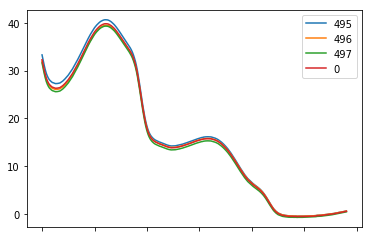

In [14]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

# Target description

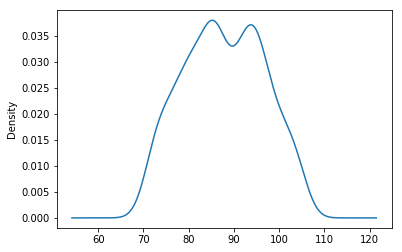

In [15]:
spectra['target'].plot.density()
plt.show()

In [16]:
# The closer to 0, the better
spectra['target'].skew()


0.0013473014665754187

# SampleID  aggregation

In [17]:
spectra[['target']].describe()

,target
count,525.000000
mean,87.808571
std,8.806655
min,71.000000
25%,80.666667
50%,87.000000
75%,94.666667
max,104.666667


OrderedDict([(0.0, 71.0), (0.25, 80.66666666666667), (0.5, 87.0), (0.75, 94.66666666666669), (1.0, 104.66666666666669)])


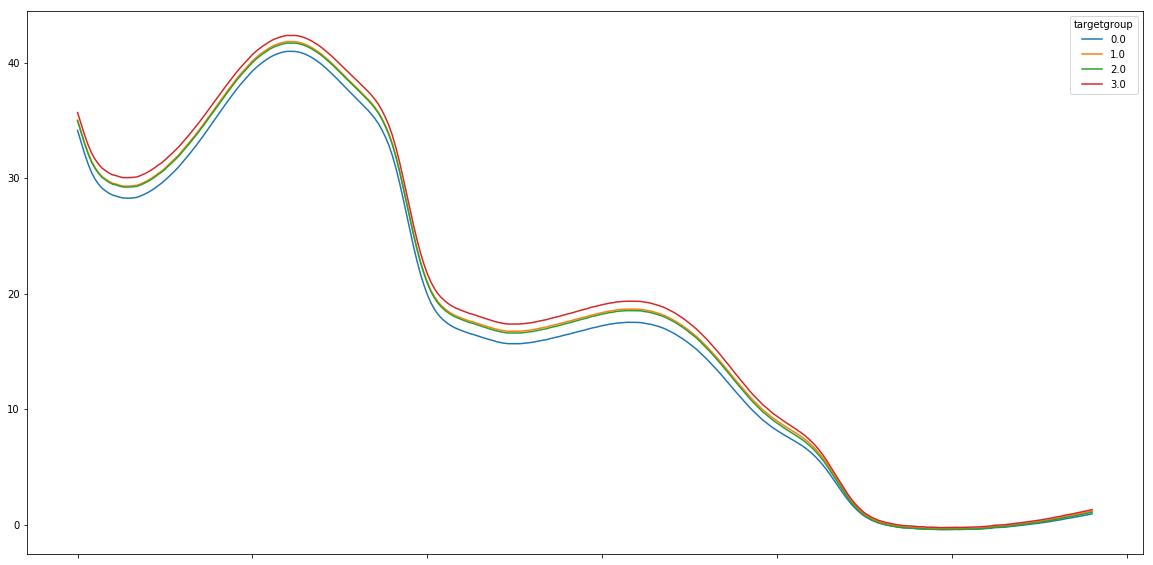

In [18]:
import collections
groupnumber = 4 +1
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    #return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


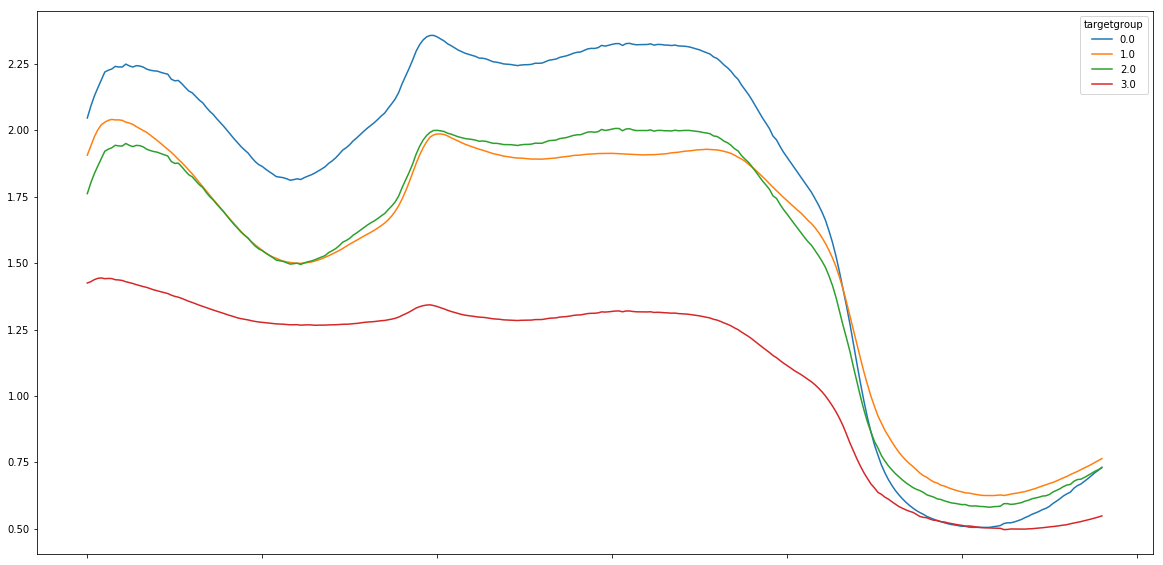

In [19]:
#Standard deviation
spectra.drop(['target', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))
plt.show()

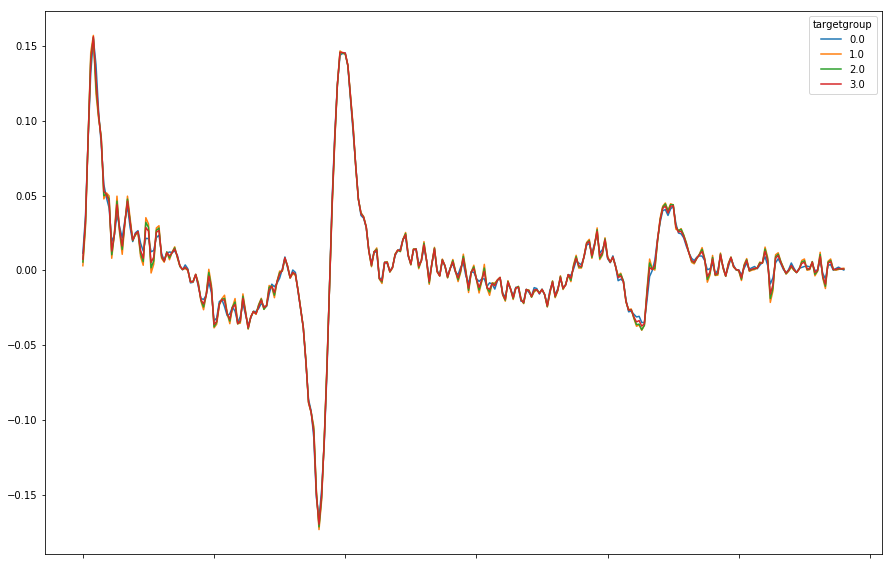

In [20]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()
colnames = [str(x) for x in range(950, 1530+1,2)]

def gradient2(entry):
    #print(entry)
    return np.gradient(np.gradient(entry))

subset = spectra[colnames].apply(gradient2, axis=1)
subset=pd.DataFrame(np.array(subset.tolist()).reshape(-1, len(colnames)), columns=colnames)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))
plt.show()

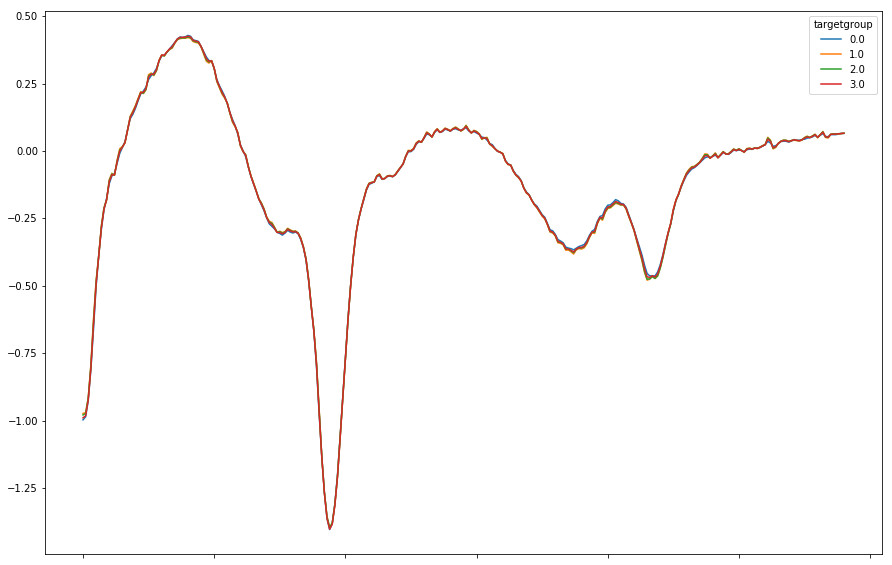

In [21]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

colnames = [str(x) for x in range(950, 1530+1,2)]

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
subset=pd.DataFrame(np.array(subset.tolist()).reshape(-1, len(colnames)), columns=colnames)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

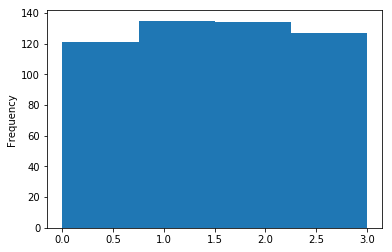

In [22]:
spectra['targetgroup'].plot.hist(bins = groupnumber-1)

# Regression

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False, random_state=47)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [25]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, window_length=5, polyorder=2, deriv=0, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        toreturn = df.apply(lambda x:savgol_filter(x, window_length=self.window_length, polyorder=self.polyorder, deriv=self.deriv), axis=1)
        return pd.DataFrame(np.array(toreturn.tolist()).reshape(-1, len(colnames)), columns=colnames)

params={'window_length':5, 'polyorder':2, 'deriv':2}
savgol = Savgol(**params)
savgol.fit_transform(spectra).shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(525, 291)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


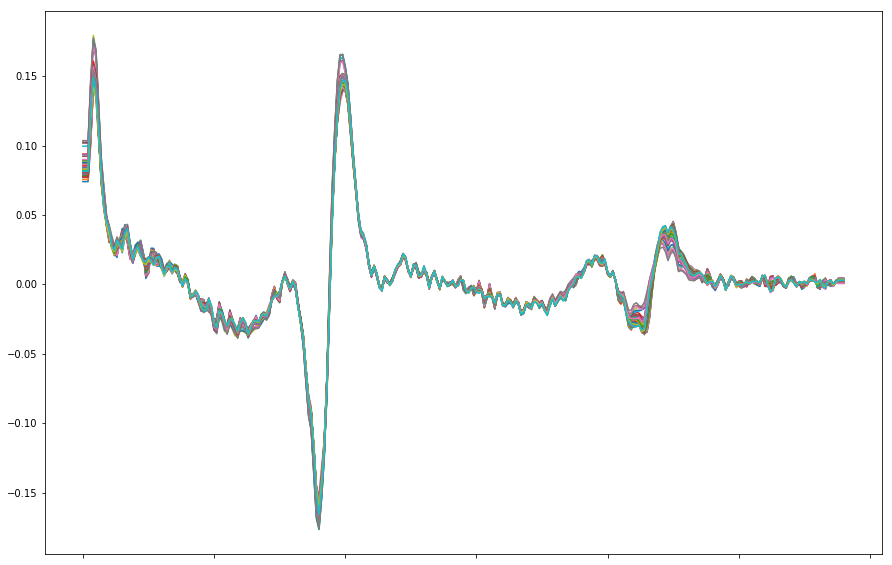

In [26]:
df = savgol.transform(spectra)
df.head(50).T.plot(legend=None, figsize=(15,10))
plt.show()

## Blocs creation

In [27]:
params={'window_length':5, 'polyorder':2, 'deriv':2}
savgol = Savgol(**params)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
from sklearn.decomposition import PCA
pca = PCA()

# Tree construction

In [30]:
lrpipelist1 = [('savgol', savgol), ('scaler', scaler), ('pca', pca)] #
pipe1 = Pipeline(lrpipelist1)
#Xtrans = pipe1.fit_transform(spectra)#.shape

In [31]:
pipe1.fit_transform(spectra).shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(525, 291)

In [32]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

In [33]:
listpipereg = [('pipe1', pipe1), ('elnet', elnet)] #
pipereg = Pipeline(listpipereg)

In [34]:
pipereg.fit(spectra, spectra['target'])

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Pipeline(memory=None,
     steps=[('pipe1', Pipeline(memory=None,
     steps=[('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994', '996', '998', '1000', '1002', '1004', '1006', '1008', '1010',...e=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))])

# PCA visualisation

In [35]:

Xtrans = pipe1.fit_transform(spectra)
Xtrans.shape

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(525, 291)

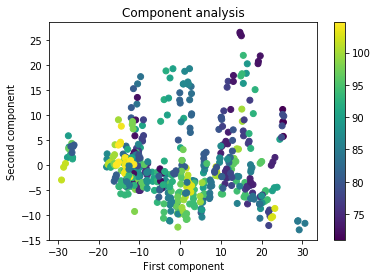

In [36]:
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=spectra['target'])
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()

### HyperOpt

In [37]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [38]:
counter = 0
bestscore = 1e20

pipe1.set_params(savgol__window_length=9)
Xtrans = pipe1.fit_transform(spectra)

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        #'max_iter':10000,
        }
    

    
    #print(hyperparams)
    #if 'window_length' in params.keys():
    #    pipe1.set_params(savgol__window_length=params['window_length'])
    #    Xtrans = pipe1.fit_transform(spectra)
    
    elnet = ElasticNet(**hyperparams)
    
    preds = cross_val_predict(elnet, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 20 == 0:
        print("{} - RMSECV {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, params))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.uniform('l1_ratio',0, 1),
    #'window_length': hp.choice('window_length',[3, 5, 7, 9, 11]),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


1 - RMSECV 6.091473889474967 - {'alpha': 0.010222288347798395, 'l1_ratio': 0.7746375442440501}
2 - RMSECV 5.477847863196168 - {'alpha': 0.047467032212202116, 'l1_ratio': 0.11915808775971737}
4 - RMSECV 5.314814006460693 - {'alpha': 0.2380778982054736, 'l1_ratio': 0.6327983012979455}
8 - RMSECV 5.267551978691986 - {'alpha': 0.0981451630182916, 'l1_ratio': 0.8714668244816721}
20 - RMSECV 7.281891913832166
23 - RMSECV 5.2572344617967275 - {'alpha': 0.11193493017224478, 'l1_ratio': 0.8745416818917032}
26 - RMSECV 5.2562242917942985 - {'alpha': 0.11141828963677308, 'l1_ratio': 0.8557538561068107}
30 - RMSECV 5.253224985253768 - {'alpha': 0.15463753230401173, 'l1_ratio': 0.8391006108683338}
31 - RMSECV 5.2520204541193936 - {'alpha': 0.15317081921816056, 'l1_ratio': 0.8225459976856785}
40 - RMSECV 5.66022620715867
60 - RMSECV 5.42302540233347
80 - RMSECV 5.759211571258443
82 - RMSECV 5.250783419784153 - {'alpha': 0.13756521661198604, 'l1_ratio': 0.7497252582241374}
88 - RMSECV 5.2506150621244

In [39]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        #'max_iter':10000,
        }
params# = {'alpha': 0.14193020994943206, 'l1_ratio': 0.8371170630455376, 'random_state': 0}

{'alpha': 0.13118210627414972,
 'l1_ratio': 0.7604683821976947,
 'random_state': 0}

In [40]:
elnet = ElasticNet(**params)

preds = cross_val_predict(elnet, Xtrans, spectra['target'], cv=kf)
mean_squared_error(preds, spectra['target'])

27.564393016607767

In [41]:
mean_squared_error(preds, spectra['target'])**.5

5.250180284200511

# hyper parameters effect

In [57]:
alpha_range = np.logspace(-3, 0, 10)
l1_ratio_range = np.linspace(0.0001, 1, 11)
param_grid = dict(alpha=alpha_range, l1_ratio=l1_ratio_range)

elnet = ElasticNet(random_state=0, max_iter=10000)

grid = GridSearchCV(elnet, param_grid=param_grid, cv=kf, n_jobs=-2, scoring='neg_mean_squared_error')
grid.fit(Xtrans, spectra['target'])


GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=False),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'alpha': array([0.001  , 0.00215, 0.00464, 0.01   , 0.02154, 0.04642, 0.1    ,
       0.21544, 0.46416, 1.     ]), 'l1_ratio': array([1.0000e-04, 1.0009e-01, 2.0008e-01, 3.0007e-01, 4.0006e-01,
       5.0005e-01, 6.0004e-01, 7.0003e-01, 8.0002e-01, 9.0001e-01,
       1.0000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

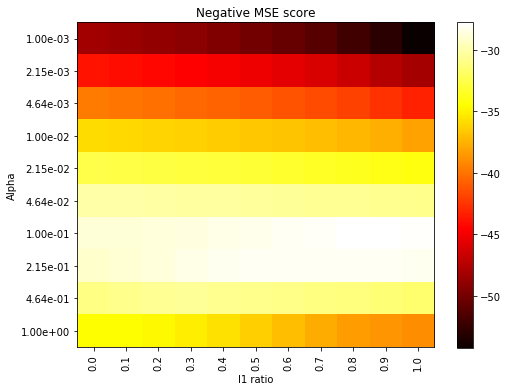

In [59]:
# heat map

scores = grid.cv_results_['mean_test_score'].reshape(len(alpha_range),len(l1_ratio_range))

plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,)
plt.ylabel('Alpha')
plt.xlabel('l1 ratio')
plt.colorbar()
plt.yticks(np.arange(len(alpha_range)), ['{:.2e}'.format(x) for x in alpha_range])
plt.xticks(np.arange(len(l1_ratio_range)), ['{:.1f}'.format(x) for x in l1_ratio_range], rotation=90)
plt.title('Negative MSE score')
plt.show()

## Coeff verification

In [42]:
elnet.fit(Xtrans,spectra['target'])
elnet.coef_[:20]

array([-0.29263971, -0.01436187, -0.54828792, -0.36518153,  0.21307279,
       -1.85479125,  0.38850449,  1.90494229, -0.65205317, -1.05924276,
        0.11886496, -0.95727966,  0.0220337 , -0.26778746,  0.51190679,
        0.8469042 , -0.1698285 , -0.71711144, -0.11080173, -0.        ])

In [43]:
elnet.coef_.max()

1.9049422944385321

In [44]:
elnet.coef_.min()

-1.854791251804816

## Score accuracy

In [45]:
df = pd.DataFrame({'target':spectra['target'], 'pred':preds, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],}) #
df.head()

,target,pred,targetgroup,sampleID
0,94.333333,94.227847,2.0,0.0
1,94.333333,96.561790,2.0,0.0
2,94.333333,97.423081,2.0,0.0
3,94.333333,96.931806,2.0,0.0
5,76.333333,79.802288,0.0,1.0


In [46]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,target,pred,targetgroup,sampleID,delta,deltaabs
0,94.333333,94.227847,2.0,0.0,0.105486,0.105486
1,94.333333,96.561790,2.0,0.0,-2.228456,2.228456
2,94.333333,97.423081,2.0,0.0,-3.089748,3.089748
3,94.333333,96.931806,2.0,0.0,-2.598473,2.598473
5,76.333333,79.802288,0.0,1.0,-3.468954,3.468954


In [47]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 525
prediction +/- 1.0 : percent 15.05 %
prediction +/- 2.0 : percent 28.76 %
prediction +/- 3.0 : percent 42.48 %
prediction +/- 4.0 : percent 54.10 %
prediction +/- 6.0 : percent 72.19 %
prediction +/- 8.0 : percent 86.29 %
prediction +/- 10.0 : percent 95.24 %


In [48]:
df[['delta']].describe()

,delta
count,525.000000
mean,-0.204984
std,5.251181
min,-13.202714
25%,-3.679268
50%,-0.345458
75%,3.436534
max,15.523054


In [49]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


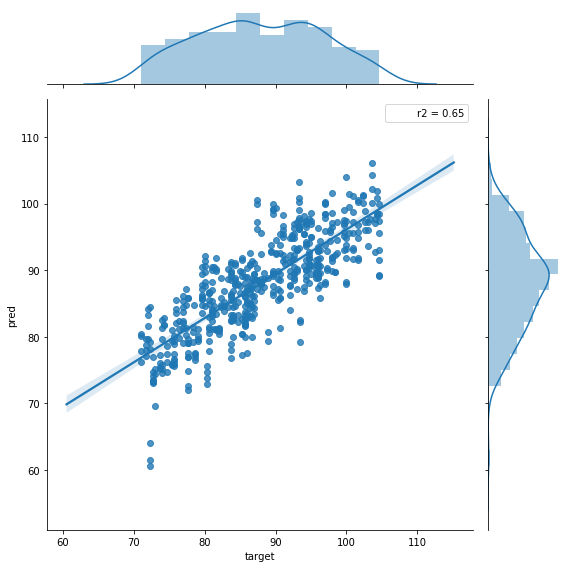

In [50]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='target', y='pred', data=df, kind='reg', height=8, stat_func=r2)
plt.show()

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


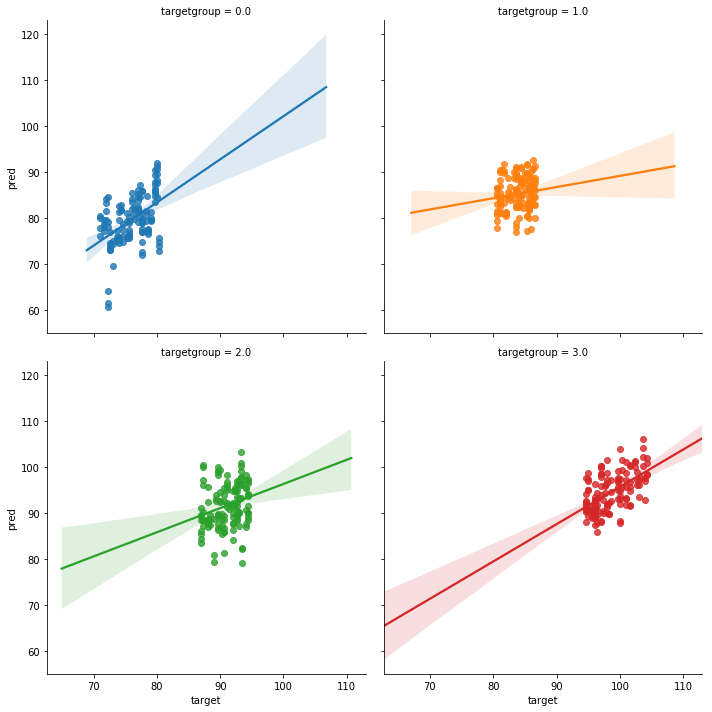

In [51]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

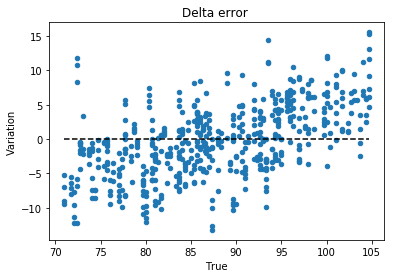

,delta
count,525.000000
mean,-0.204984
std,5.251181
min,-13.202714
25%,-3.679268
50%,-0.345458
75%,3.436534
max,15.523054


In [52]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

In [54]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()

In [55]:
from sklearn.svm import SVR
svr = SVR()

In [56]:
counter = 0
bestscore = 1e20

pipe1.set_params(savgol__window_length=9)
Xtrans = pipe1.fit_transform(spectra)



def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        #'gamma': params['gamma'],
        #'alpha': params['alpha'],
        #'kernel': params['kernel'],
        #'degree': params['degree'],
        'C':params['C'],
        'epsilon':params['epsilon'],
        }
    
    #print(hyperparams)
    
    #krr = KernelRidge(**hyperparams)
    svr = SVR(**hyperparams)
    
    preds = cross_val_predict(svr, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    #'gamma': hp.loguniform('gamma', -2, 1),
    #'alpha': hp.loguniform('alpha',-3, 0),
    #'kernel':hp.choice('kernel', ['poly']), #
    #'degree':hp.choice('degree', [2]),
    'C': hp.loguniform('C', -2, 1),
    'epsilon': hp.loguniform('epsilon', -2, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

/Users/cricket/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


1 - RMSECV 8.08562079457523 - {'C': 0.4161753360521426, 'epsilon': 1.123329588973565}
2 - RMSECV 7.9832295241009374 - {'C': 0.6532575987500842, 'epsilon': 1.8960131744355457}
3 - RMSECV 7.8777758938414415 - {'C': 0.6098983220343374, 'epsilon': 0.16741737517194014}
4 - RMSECV 7.084374161545476 - {'C': 2.467653128604584, 'epsilon': 0.2988188147515881}
10 - RMSE 8.582267090494167
12 - RMSECV 7.04855185507786 - {'C': 2.598527942858364, 'epsilon': 0.29430080995206603}
20 - RMSE 8.362202701431247
21 - RMSECV 7.039270914296383 - {'C': 2.6144438446365963, 'epsilon': 0.39178429390122593}
26 - RMSECV 7.025463590011696 - {'C': 2.6797483690826884, 'epsilon': 0.3340659428058311}
28 - RMSECV 7.02124521075517 - {'C': 2.692079570808209, 'epsilon': 0.3588610956294584}
30 - RMSE 7.439991424538582
40 - RMSE 8.18362375274715
50 - RMSE 7.116576268605788
60 - RMSE 7.678817519662723
70 - RMSE 7.2186775062655
72 - RMSECV 7.016866107767608 - {'C': 2.6874448378608515, 'epsilon': 0.5025342288134403}
80 - RMSE 7.